In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
x_train_df = pd.read_csv("datas/X_train.csv")
y_train_df = pd.read_csv("datas/y_train.csv")

In [101]:
x_test_df = pd.read_csv("datas/X_test.csv")

In [102]:
x_train_df.drop("Id", axis=1, inplace=True)
y = (y_train_df['單價元平方公尺'])

In [103]:
x_tmp_df = x_train_df.copy()
x_tmp_df['單價元平方公尺'] = y_train_df['單價元平方公尺']

C:\Users\Tim Chen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='單價元平方公尺'>

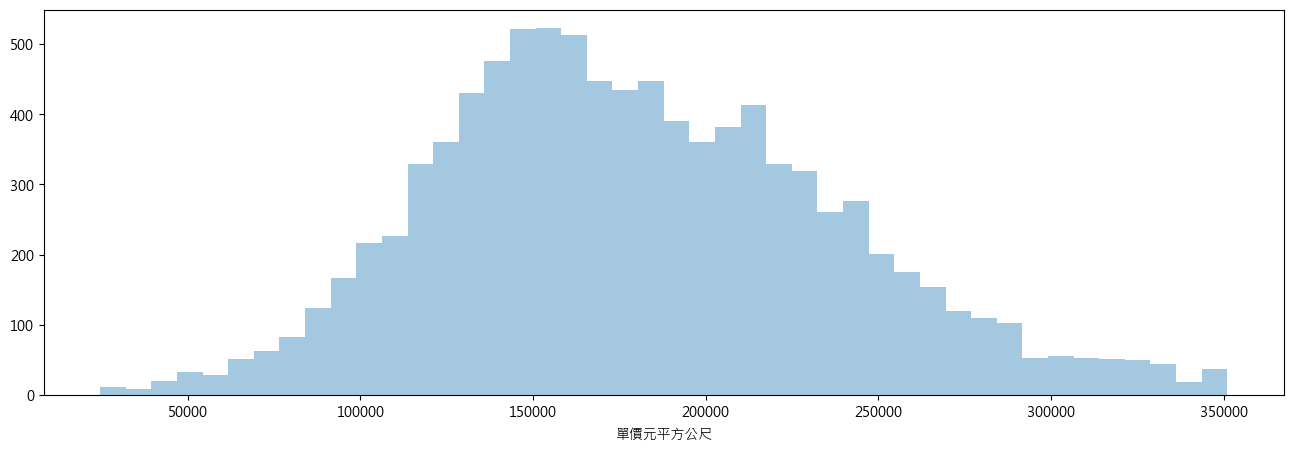

In [104]:
plt.figure(figsize=(16, 5))
#去掉拟合的密度估计曲线，kde参数设为False
sns.distplot(y,kde=False)  
# 'kde' 是控制密度估计曲线的参数，默认为 True，不设置会默认显示，如果我们将其设为 False，则不显示密度曲线。

In [105]:
print(x_tmp_df.columns, len(x_tmp_df.columns))

Index(['鄉鎮市區', '交易標的', '路名', '土地移轉總面積平方公尺', '都市土地使用分區', '土地數', '建物數', '車位數',
       '移轉層次', '移轉層次項目', '總樓層數', '建物型態', '主要用途', '主要建材', '建築完成年月',
       '建物移轉總面積平方公尺', '建物現況格局-房', '建物現況格局-廳', '建物現況格局-衛', '建物現況格局-隔間',
       '有無管理組織', '交易年', '交易日', '交易月', '地鐵站', '超商', '公園', '托兒所', '國小', '國中',
       '高中職', '大學', '金融機構', '醫院', '大賣場', '超市', '百貨公司', '警察局', '消防局', '縱坐標',
       '橫坐標', '單價元平方公尺'],
      dtype='object') 42


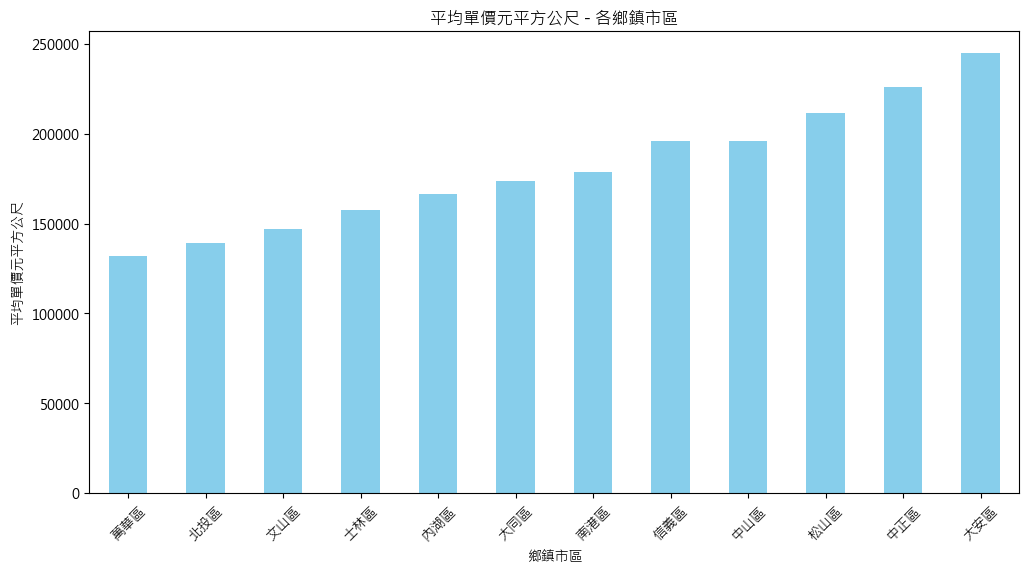

In [106]:
x = x_tmp_df['鄉鎮市區']
y = y_train_df['單價元平方公尺']

# 指定中文字體
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 使用系統中的中文字體
plt.rcParams['axes.unicode_minus'] = False  # 避免負號顯示為方塊

# 合併 x 和 y 數據到單一 DataFrame 中
data = pd.DataFrame({'鄉鎮市區': x, '單價元平方公尺': y})

# 計算每個鄉鎮市區的平均單價
avg_price_per_area = data.groupby('鄉鎮市區')['單價元平方公尺'].median()

# 繪製條形圖
plt.figure(figsize=(12, 6))
avg_price_per_area.sort_values().plot(kind='bar', color='skyblue')
plt.title('平均單價元平方公尺 - 各鄉鎮市區')
plt.xlabel('鄉鎮市區')
plt.ylabel('平均單價元平方公尺')
plt.xticks(rotation=45)
plt.show()

     鄉鎮市區   單價元平方公尺  平均單價元平方公尺       殘差           標準差
0     文山區  161672.0   147239.0  14433.0  37597.807176
1     中正區  314824.0   226264.0  88560.0  57803.030952
2     文山區  181986.0   147239.0  34747.0  37597.807176
3     內湖區  168460.0   166518.5   1941.5  46560.809769
4     北投區  134360.0   139213.0  -4853.0  47295.300058
...   ...       ...        ...      ...           ...
9455  松山區  269548.0   211517.5  58030.5  49452.293477
9456  文山區  163043.0   147239.0  15804.0  37597.807176
9457  中山區  212114.0   195828.5  16285.5  52465.723467
9458  南港區  185750.0   178613.0   7137.0  44208.516448
9459  北投區  171394.0   139213.0  32181.0  47295.300058

[9460 rows x 5 columns]


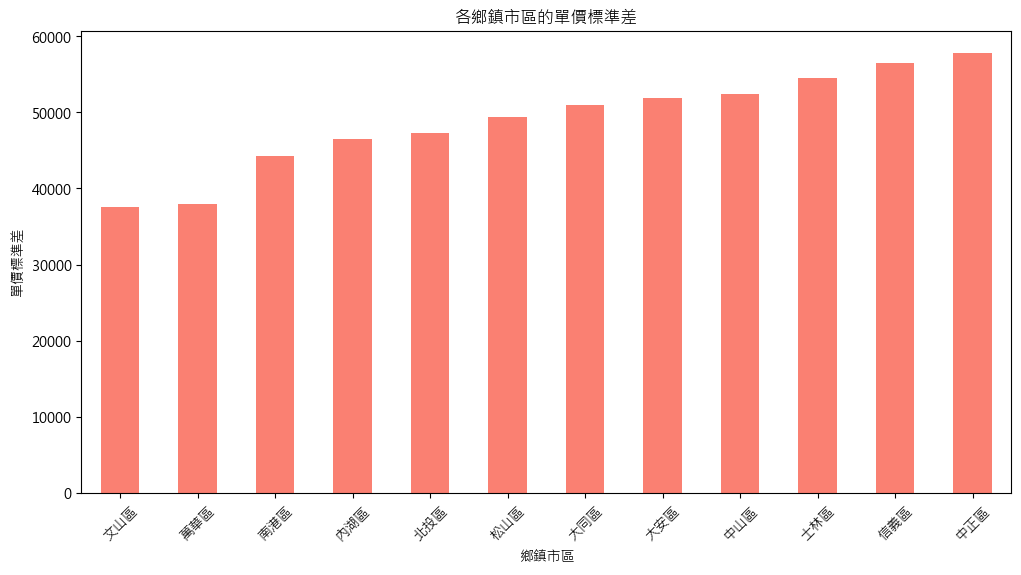

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

# 假設 x_train_df 和 y_train_df 已經定義好並包含所需資料
x = x_tmp_df['鄉鎮市區']
y = y_train_df['單價元平方公尺']

# 合併 x 和 y 數據到單一 DataFrame 中
data = pd.DataFrame({'鄉鎮市區': x, '單價元平方公尺': y})

# 計算每個鄉鎮市區的平均單價
avg_price_per_area = data.groupby('鄉鎮市區')['單價元平方公尺'].median()
data['平均單價元平方公尺'] = data['鄉鎮市區'].map(avg_price_per_area)

# 計算每個資料點的殘差
data['殘差'] = data['單價元平方公尺'] - data['平均單價元平方公尺']

# 計算每個鄉鎮市區的標準差
std_dev_per_area = data.groupby('鄉鎮市區')['單價元平方公尺'].std()
data['標準差'] = data['鄉鎮市區'].map(std_dev_per_area)

# 顯示結果
print(data[['鄉鎮市區', '單價元平方公尺', '平均單價元平方公尺', '殘差', '標準差']])

# 如果需要視覺化標準差的分布
plt.figure(figsize=(12, 6))
std_dev_per_area.sort_values().plot(kind='bar', color='salmon')
plt.title('各鄉鎮市區的單價標準差')
plt.xlabel('鄉鎮市區')
plt.ylabel('單價標準差')
plt.xticks(rotation=45)
plt.show()

     鄉鎮市區          交易標的      路名  土地移轉總面積平方公尺  都市土地使用分區  土地數  建物數  車位數  移轉層次  \
0     文山區  房地(土地+建物)+車位   興隆路三段        27.75         住  1.0  1.0  1.0     1   
1     中正區     房地(土地+建物)  金山南路一段         9.57    第三種住宅區  1.0  1.0  0.0     5   
2     文山區     房地(土地+建物)   秀明路一段         9.51         住  1.0  1.0  0.0     1   
3     內湖區  房地(土地+建物)+車位     康樂街        23.67    第三種住宅區  1.0  1.0  1.0    10   
4     北投區     房地(土地+建物)     公路        22.50    第三種住宅區  1.0  1.0  0.0     2   
...   ...           ...     ...          ...       ...  ...  ...  ...   ...   
9455  松山區     房地(土地+建物)   八德路三段        29.01  第三之一種住宅區  1.0  1.0  0.0     3   
9456  文山區     房地(土地+建物)  羅斯福路五段        20.48         住  2.0  1.0  0.0     2   
9457  中山區  房地(土地+建物)+車位     基湖路       136.19         住  1.0  1.0  3.0     3   
9458  南港區  房地(土地+建物)+車位     興南街        39.45         住  1.0  1.0  1.0    11   
9459  北投區  房地(土地+建物)+車位     磺港路        30.98    第三種住宅區  1.0  1.0  2.0     2   

     移轉層次項目  ...    醫院   大賣場    超市  百貨公司   警察局   消防

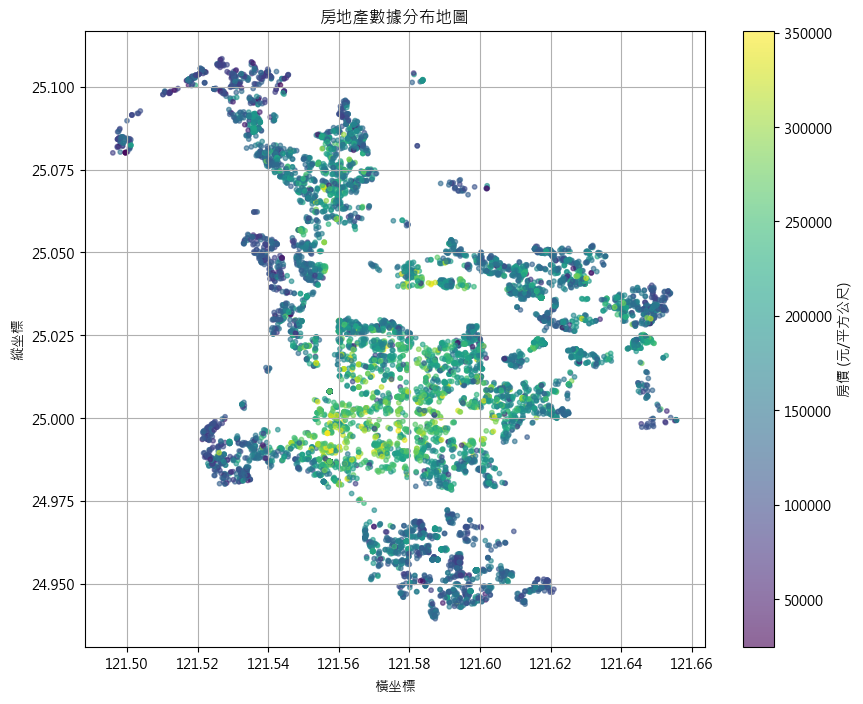

In [108]:
import matplotlib.pyplot as plt
import pandas as pd

# 確保 x_train_df 和 y_train_df 有相同的索引
data = pd.merge(x_tmp_df, y_train_df[['單價元平方公尺']], left_index=True, right_index=True)
print(data)
# 提取橫坐標、縱坐標和房價資料
x_coords = data['橫坐標'].values
y_coords = data['縱坐標'].values
prices = data['單價元平方公尺_x'].values

# 繪製散點圖，使用房價資料作為顏色映射
plt.figure(figsize=(10, 8))
scatter = plt.scatter(x_coords, y_coords, c=prices, cmap='viridis', alpha=0.6, s=10)  # 使用房價資料來設置顏色

# 加入顏色條顯示房價範圍
cbar = plt.colorbar(scatter)
cbar.set_label("房價 (元/平方公尺)")

# 標題和軸標籤
plt.title("房地產數據分布地圖")
plt.xlabel("橫坐標")
plt.ylabel("縱坐標")

# 顯示地圖
plt.grid(True)
plt.show()

In [109]:
build_features = ['建築年', '建築月', '建築日']
x_train_df['建築完成年月'] = pd.to_datetime(x_train_df['建築完成年月'])

new_df = pd.DataFrame()
new_df['建築年'] = x_train_df['建築完成年月'].dt.year
new_df['建築月'] = x_train_df['建築完成年月'].dt.month
new_df['建築日'] = x_train_df['建築完成年月'].dt.day

print(new_df)
x_train_df = pd.concat([x_train_df, new_df], axis=1)
x_train_df.drop('建築完成年月', axis=1, inplace=True)

print(x_train_df)

       建築年  建築月  建築日
0     2019   10   16
1     1997    8   20
2     2009    5   13
3     2009    4   24
4     1973    2   15
...    ...  ...  ...
9455  1975   12   11
9456  1977   12   30
9457  2001    7   24
9458  2012    8   13
9459  2008    7   25

[9460 rows x 3 columns]
     鄉鎮市區          交易標的      路名  土地移轉總面積平方公尺  都市土地使用分區  土地數  建物數  車位數  移轉層次  \
0     文山區  房地(土地+建物)+車位   興隆路三段        27.75         住  1.0  1.0  1.0     1   
1     中正區     房地(土地+建物)  金山南路一段         9.57    第三種住宅區  1.0  1.0  0.0     5   
2     文山區     房地(土地+建物)   秀明路一段         9.51         住  1.0  1.0  0.0     1   
3     內湖區  房地(土地+建物)+車位     康樂街        23.67    第三種住宅區  1.0  1.0  1.0    10   
4     北投區     房地(土地+建物)     公路        22.50    第三種住宅區  1.0  1.0  0.0     2   
...   ...           ...     ...          ...       ...  ...  ...  ...   ...   
9455  松山區     房地(土地+建物)   八德路三段        29.01  第三之一種住宅區  1.0  1.0  0.0     3   
9456  文山區     房地(土地+建物)  羅斯福路五段        20.48         住  2.0  1.0  0.0     2   
9457  中山區  房

In [110]:
def cal_distance(x, y, anchor):
    square_sum = (anchor[0] - x) ** 2 + (anchor[1] - y) ** 2
    return np.sqrt(square_sum)

In [111]:
city_list = x_train_df['鄉鎮市區'].unique()

# 對每個市區計算距離並新增欄位
for city in city_list:
    # 取得該市區的資料
    x_city_df = x_train_df[x_train_df['鄉鎮市區'] == city]
    
    # 計算該市區的 anchor 為橫坐標和縱坐標的平均值
    anchor = [x_city_df['橫坐標'].median(), x_city_df['縱坐標'].median()]
    
    # 動態生成欄位名稱
    distance_column = f'距離_{city}'
    
    # 計算每個樣本點到該市區 anchor 的距離，並存入新的欄位
    x_train_df[distance_column] = x_train_df.apply(
        lambda row: cal_distance(row['橫坐標'], row['縱坐標'], anchor), axis=1
    )

# 檢查結果（顯示前幾行）
print(x_train_df.head())

  鄉鎮市區          交易標的      路名  土地移轉總面積平方公尺 都市土地使用分區  土地數  建物數  車位數  移轉層次  \
0  文山區  房地(土地+建物)+車位   興隆路三段        27.75        住  1.0  1.0  1.0     1   
1  中正區     房地(土地+建物)  金山南路一段         9.57   第三種住宅區  1.0  1.0  0.0     5   
2  文山區     房地(土地+建物)   秀明路一段         9.51        住  1.0  1.0  0.0     1   
3  內湖區  房地(土地+建物)+車位     康樂街        23.67   第三種住宅區  1.0  1.0  1.0    10   
4  北投區     房地(土地+建物)     公路        22.50   第三種住宅區  1.0  1.0  0.0     2   

  移轉層次項目  ...    距離_內湖區    距離_北投區    距離_松山區    距離_信義區    距離_大安區    距離_萬華區  \
0      無  ...  0.084339  0.136460  0.058739  0.043628  0.038279  0.064761   
1      無  ...  0.070921  0.089894  0.036263  0.043767  0.014669  0.028590   
2      無  ...  0.084034  0.144533  0.063204  0.044701  0.047928  0.077880   
3      無  ...  0.066284  0.079042  0.032792  0.045571  0.021660  0.032971   
4      無  ...  0.077748  0.099895  0.043163  0.046109  0.015495  0.026344   

     距離_南港區    距離_士林區    距離_大同區    距離_中山區  
0  0.066559  0.109100  0.079421  0.068570 

In [112]:
x_train_df['屋齡'] = x_train_df.apply(lambda row: row['交易年'] - row['建築年'] + 1, axis=1)

# Check the new column
print(x_train_df[['交易年', '建築年', '屋齡']].head())

    交易年   建築年  屋齡
0  2019  2019   1
1  2021  1997  25
2  2020  2009  12
3  2019  2009  11
4  2021  1973  49


In [113]:
# 新增 '區域環境評估' 欄位並設初始值為 0
x_train_df['區域環境評估'] = 0

# 逐列計算區域環境評估分數
# 設定各類設施的權重
weights = {
    '托兒所': 1, '國小': 1, '國中': 1, '高中職': 1, '大學': 1,
    '金融機構': 1, '醫院': 1, '大賣場': 1, '超市': 1, '百貨公司': 1,
    '警察局': 1, '消防局': 1
}

# 逐列計算帶權重的區域環境評估
for index, row in x_train_df.iterrows():
    region_value = sum(row[facility] * weight for facility, weight in weights.items())
    x_train_df.at[index, '區域環境評估'] = region_value

# 檢查結果
print(x_train_df['區域環境評估'].head())

0    199
1    226
2    191
3    182
4    191
Name: 區域環境評估, dtype: int64


Text(0.5, 1.0, ' Grlivarea and SalePrice')

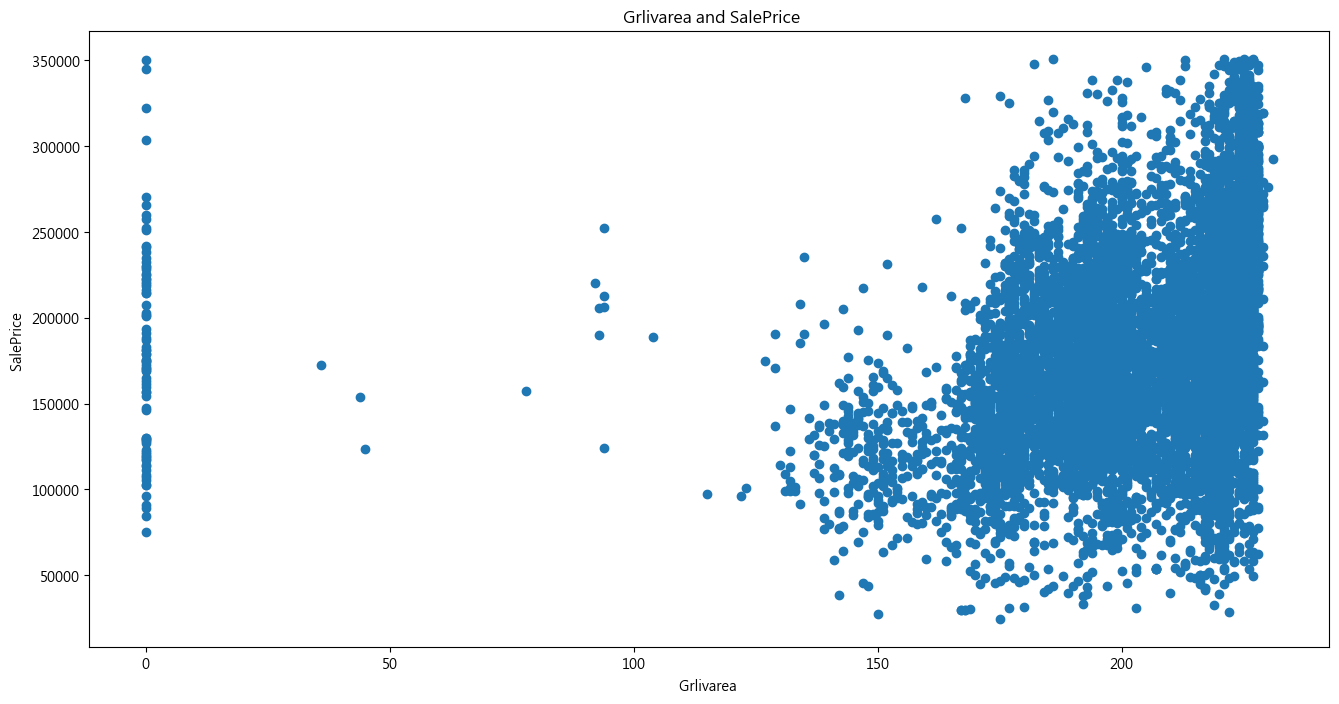

In [114]:
plt.figure(figsize=(16, 8))
plt.scatter(x=x_train_df['區域環境評估'], y=y_train_df['單價元平方公尺'])
plt.ylim=(0,800000)  # y坐标轴范围
plt.xlabel('Grlivarea ')  # x轴名称
plt.ylabel('SalePrice ')  # y轴名称
plt.title(' Grlivarea and SalePrice') #标题

[36, 44, 45, 78, 92, 93, 94, 104, 115, 122, 123, 127, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231]


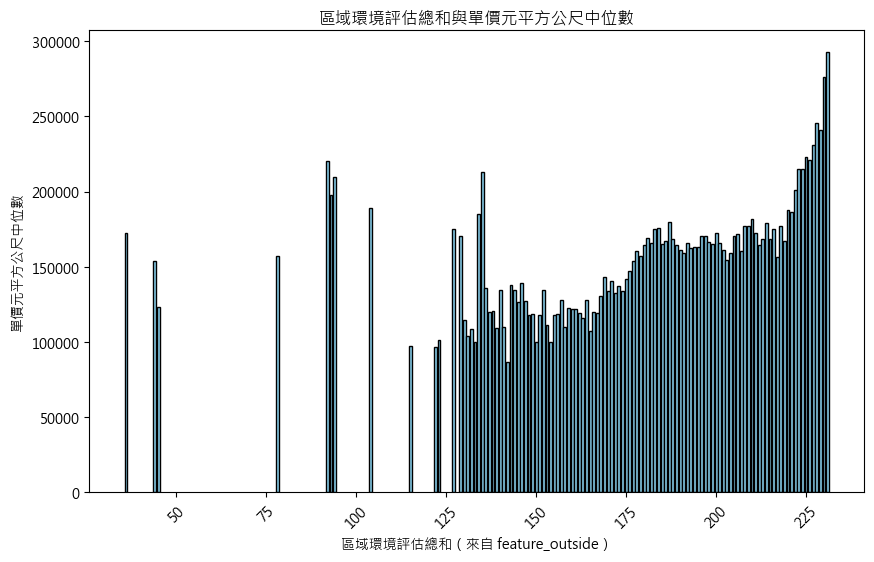

In [115]:
import numpy as np
import matplotlib.pyplot as plt

# 計算各特徵的總和，只考慮 '內湖區' 的數據
x_sum = x_train_df['區域環境評估']
x = dict()
# 將每個特徵總和對應的單價元平方公尺值存入字典
for elem, value in zip(x_sum, y_train_df['單價元平方公尺']):
    if elem not in x.keys():
        x[elem] = []
    x[elem].append(value)

# 排序總和的鍵
ks = sorted(x.keys())[1:]
print(ks)

# 計算每個總和對應的中位數單價元平方公尺
values = [np.median(x[k]) for k in ks]

# 繪製柱狀圖
plt.figure(figsize=(10, 6))
plt.bar(ks, values, color='skyblue', edgecolor='k')
plt.title('區域環境評估總和與單價元平方公尺中位數')
plt.xlabel('區域環境評估總和（來自 feature_outside）')
plt.ylabel('單價元平方公尺中位數')
plt.xticks(rotation=45)
plt.show()

In [116]:
import numpy as np

def calculate_smoothness(y_values):
    # Calculate the differences between consecutive y-values
    differences = np.diff(y_values)
    
    # Calculate the standard deviation of the differences
    smoothness_score = np.std(differences)
    
    return smoothness_score

# Example usage with your values (for instance, the 'values' array from your chart data):
smoothness = calculate_smoothness(values)
print(f"Smoothness score: {smoothness}")


Smoothness score: 21620.96823681192


In [117]:
new_weights = {
    '托兒所': 1, '國小': 1, '國中': 1, '高中職': 1, '大學': 1,
    '金融機構': 1, '醫院': 1, '大賣場': 1, '超市': 1, '百貨公司': 1,
    '警察局': 1, '消防局': 1
}
print(new_weights)

{'托兒所': 1, '國小': 1, '國中': 1, '高中職': 1, '大學': 1, '金融機構': 1, '醫院': 1, '大賣場': 1, '超市': 1, '百貨公司': 1, '警察局': 1, '消防局': 1}


In [118]:
for index, row in x_train_df.iterrows():
    region_value = sum(row[facility] * weight for facility, weight in new_weights.items())
    x_train_df.at[index, '區域環境評估'] = region_value

# x_train_df = x_train_df[x_train_df['區域環境評估'] != 0]
# 檢查結果
print(x_train_df['區域環境評估'].head())

0    199
1    226
2    191
3    182
4    191
Name: 區域環境評估, dtype: int64


[36, 44, 45, 78, 92, 93, 94, 104, 115, 122, 123, 127, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231]


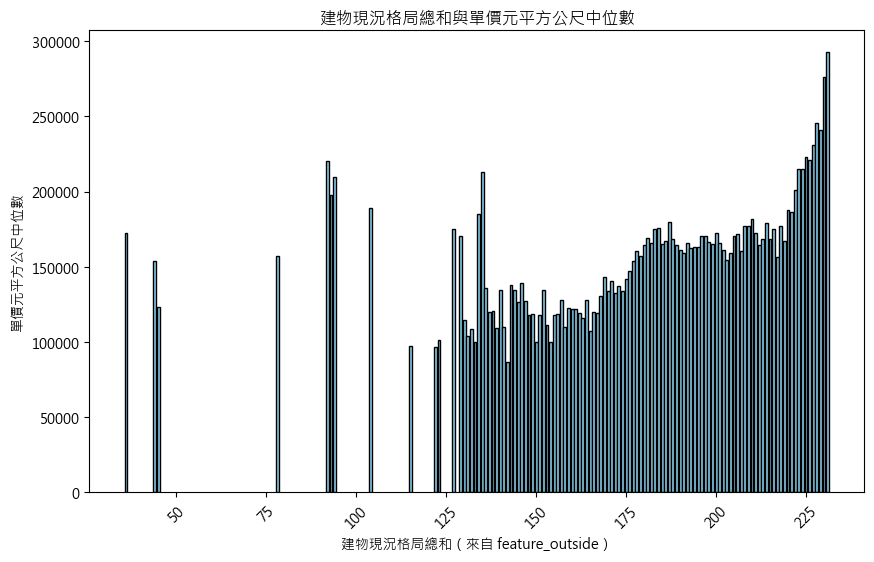

9460


In [119]:
import numpy as np
import matplotlib.pyplot as plt

# 計算各特徵的總和，只考慮 '內湖區' 的數據
x_sum = x_train_df['區域環境評估']
x = dict()
# 將每個特徵總和對應的單價元平方公尺值存入字典
for elem, value in zip(x_sum, y_train_df['單價元平方公尺']):
    if elem not in x.keys():
        x[elem] = []
    x[elem].append(value)

# 排序總和的鍵
ks = sorted(x.keys())[1:]
print(ks)

# 計算每個總和對應的中位數單價元平方公尺
values = [np.median(x[k]) for k in ks]

# 繪製柱狀圖
plt.figure(figsize=(10, 6))
plt.bar(ks, values, color='skyblue', edgecolor='k')
plt.title('建物現況格局總和與單價元平方公尺中位數')
plt.xlabel('建物現況格局總和（來自 feature_outside）')
plt.ylabel('單價元平方公尺中位數')
plt.xticks(rotation=45)
plt.show()
print(len(x_train_df))

In [120]:
import numpy as np

place_avgPriceList = dict()
place_avgPrice = dict()

# 第一步：將每個區域的 '單價元平方公尺' 加入到對應的清單中
for index, row in x_tmp_df.iterrows():
    place = row['路名']
    if place not in place_avgPriceList:
        place_avgPriceList[place] = list()  # 初始化區域清單
        place_avgPrice[place] = 0  # 初始化區域平均價格
    place_avgPriceList[place].append(row['單價元平方公尺'])  # 將價格加入區域清單

# 第二步：計算每個區域的平均價格
for key in place_avgPriceList.keys():  # 修正這裡
    place_avgPrice[key] = np.mean(place_avgPriceList[key])

# 檢查結果
print(place_avgPrice)

{'興隆路三段': 149483.46478873238, '金山南路一段': 275108.71428571426, '秀明路一段': 164893.07272727272, '康樂街': 150248.4775280899, '公\ue16d路': 127252.5, '中央北路三段': 117770.05263157895, '南京東路五段': 201895.11320754717, '忠孝東路五段': 231355.14285714287, '三福街': 158526.875, '基隆路一段': 233743.89285714287, '信義路六段': 177209.53333333333, '和平東路一段': 303947.2727272727, '西園路二段': 141752.15254237287, '南港路二段': 190178.88888888888, '復興南路一段': 242601.0, '民生東路五段': 211372.7037037037, '中華路二段': 150693.93617021278, '後港街': 164874.85714285713, '民權西路': 189952.85, '社中街': 123598.67567567568, '木柵路一段': 132143.84615384616, '師大路': 226150.875, '劍潭路': 223366.55555555556, '汀州路二段': 187203.82352941178, '經貿二路': 217877.91666666666, '重陽路': 177972.3116883117, '稻香路': 107472.81818181818, '奇岩路': 132290.33333333334, '明水路': 254235.45454545456, '安居街': 174012.0, '文林路': 168468.46153846153, '吉林路': 162496.21212121213, '同安街': 173303.76923076922, '陽光街': 211952.97959183675, '龍江路': 181889.6, '內湖路三段': 144610.7142857143, '光復南路': 242480.53458498025, '復興北路': 212981.020408

In [121]:
# 先創建一個 '平均價格' 的新列，並初始化為 0
x_train_df['路名_平均價格'] = 0

# 使用 .loc 來直接修改 DataFrame
for index, row in x_train_df.iterrows():
    x_train_df.loc[index, '路名_平均價格'] = place_avgPrice[row['路名']]

In [122]:
import numpy as np
x_tmp_df['屋齡'] = x_train_df['屋齡']

age_avgPriceList = dict()
age_avgPrice = dict()

# 第一步：將每個區域的 '單價元平方公尺' 加入到對應的清單中
for index, row in x_tmp_df.iterrows():
    age = row['屋齡']
    if age not in age_avgPriceList:
        age_avgPriceList[age] = list()  # 初始化區域清單
        age_avgPrice[age] = 0  # 初始化區域平均價格
    age_avgPriceList[age].append(row['單價元平方公尺'])  # 將價格加入區域清單

# 第二步：計算每個區域的平均價格
for key in age_avgPriceList.keys():  # 修正這裡
    age_avgPrice[key] = np.mean(age_avgPriceList[key])

# 檢查結果
print(age_avgPrice)


{1: 215773.8045112782, 25: 182227.60693641618, 12: 198762.86092715233, 11: 188124.9581395349, 49: 172827.9603960396, 45: 168309.49253731343, 47: 178983.14130434784, 26: 180768.33125, 3: 203462.37288135593, 43: 161165.12060301506, 28: 176615.83, 13: 213273.16363636364, 55: 188772.1884057971, 42: 157635.16822429906, 16: 202904.50887573964, 57: 171313.79545454544, 30: 173006.28787878787, 56: 161635.3188405797, 27: 178004.1338582677, 0: 213802.06451612903, 23: 183584.48920863308, 34: 173340.40803491208, 6: 197502.73684210525, 14: 212181.17757009345, 58: 162260.47619047618, 37: 153965.8250728863, 2: 209825.00512820514, 36: 170907.58957654724, 7: 188242.92134831462, 44: 160579.5787037037, 39: 156066.6222222222, 50: 167938.1987951807, -2: 213542.8, 21: 191026.3076923077, 38: 160098.19266055047, 18: 189672.96212121213, 40: 149384.4160839161, 35: 175093.77092511012, 53: 168639.08521739132, 41: 157587.19130434783, 59: 179338.5, 5: 182731.67647058822, 10: 188976.4885496183, 48: 164764.28729281767

In [123]:
# 先創建一個 '平均價格' 的新列，並初始化為 0
x_train_df['屋齡_平均價格'] = 0

# 使用 .loc 來直接修改 DataFrame
for index, row in x_train_df.iterrows():
    x_train_df.loc[index, '屋齡_平均價格'] = age_avgPrice[row['屋齡']]

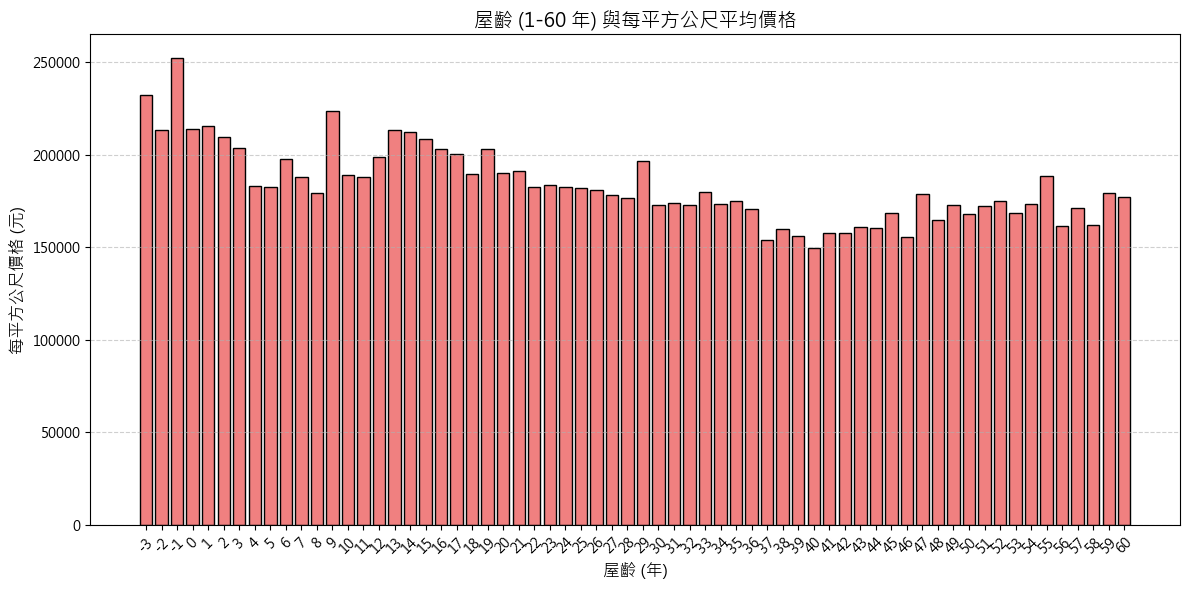

In [124]:
import matplotlib.pyplot as plt

age_avgPrice_30 = {age: price for age, price in age_avgPrice.items() if age <= 60}

# 提取資料以供繪圖
ages = list(age_avgPrice_30.keys())
avg_prices = list(age_avgPrice_30.values())

# 繪製條形圖
plt.figure(figsize=(12, 6))
plt.bar(ages, avg_prices, color='lightcoral', edgecolor='black', width=0.8)
plt.title('屋齡 (1-60 年) 與每平方公尺平均價格', fontsize=14)
plt.xlabel('屋齡 (年)', fontsize=12)
plt.ylabel('每平方公尺價格 (元)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(ages, fontsize=10, rotation=45)  # 設定 x 軸刻度和旋轉角度
plt.tight_layout()  # 自動調整圖表避免擠壓
plt.show()

In [125]:
import numpy as np

# 初始化字典來儲存每個主要用途的價格清單及平均價格
usage_avgPriceList = dict()
usage_avgPrice = dict()

# 第一步：將每個主要用途的 '單價元平方公尺' 加入到對應的清單中
for index, row in x_tmp_df.iterrows():
    usage = row['主要用途']
    if usage not in usage_avgPriceList:
        usage_avgPriceList[usage] = list()  # 初始化主要用途的價格清單
        usage_avgPrice[usage] = 0  # 初始化主要用途的平均價格
    usage_avgPriceList[usage].append(row['單價元平方公尺'])  # 將價格加入主要用途清單

# 第二步：計算每個主要用途的平均價格
for key in usage_avgPriceList.keys():
    usage_avgPrice[key] = np.mean(usage_avgPriceList[key])

# 檢查結果
print(usage_avgPrice)


{'見其他登記事項': 194882.73665893273, '住家用': 176446.04218582745, '集合住宅': 207425.57181571817, '一般事務所': 258877.6, '商業用': 198320.2914121452, '多戶住宅': 202587.41176470587, '住商用': 188644.0, '工業用': 157782.52173913043, '自由職業事務所（不含文化藝術工作室）': 257951.5, '見使用執照': 179119.5633802817, '自由職業事務所': 296141.71428571426, '策略性產業': 303488.6666666667, '員工宿舍': 117800.0, '其他': 209069.0, '辦公室': 250737.0, '辦公用': 229143.33333333334, '（Ｇ３）醫療保健服務業（醫事技術業）': 256042.0, '一般零售業': 235495.4, '住宅': 205469.0, '國民住宅': 135268.0}


In [126]:
# 先創建一個 '平均價格' 的新列，並初始化為 0
x_train_df['主要用途_平均價格'] = 0

# 使用 .loc 來直接修改 DataFrame
for index, row in x_train_df.iterrows():
    x_train_df.loc[index, '主要用途_平均價格'] = usage_avgPrice[row['主要用途']]

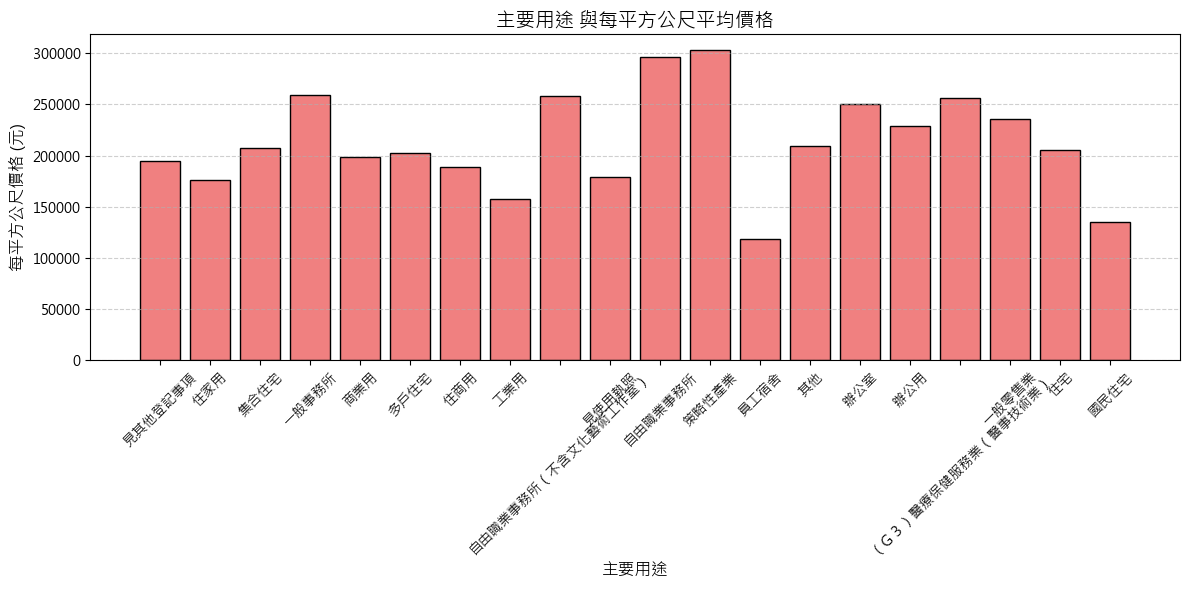

In [127]:
import matplotlib.pyplot as plt

# 使用所有的 '主要用途' 和對應的平均價格
usage_avgPrice_all = usage_avgPrice

# 提取資料以供繪圖
usages = list(usage_avgPrice_all.keys())
avg_prices = list(usage_avgPrice_all.values())

# 繪製條形圖
plt.figure(figsize=(12, 6))

plt.bar(usages, avg_prices, color='lightcoral', edgecolor='black', width=0.8)
plt.title('主要用途 與每平方公尺平均價格', fontsize=14)
plt.xlabel('主要用途', fontsize=12)
plt.ylabel('每平方公尺價格 (元)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(usages, fontsize=10, rotation=45)  # 設定 x 軸刻度和旋轉角度
plt.tight_layout()  # 自動調整圖表避免擠壓
plt.show()

In [128]:
area_avgPriceList = dict()
area_avgPrice = dict()

x_tmp_df['區域環境評估'] = x_train_df['區域環境評估']

# 第一步：將每個 '區域環境評估' 的 '單價元平方公尺' 加入到對應的清單中
for index, row in x_tmp_df.iterrows():
    area = row['區域環境評估']  # 使用 '區域環境評估' 代替 '都市土地使用分區'
    if area not in area_avgPriceList:
        area_avgPriceList[area] = list()  # 初始化區域清單
        area_avgPrice[area] = 0  # 初始化區域平均價格
    area_avgPriceList[area].append(row['單價元平方公尺'])  # 將價格加入區域清單

# 第二步：計算每個區域的平均價格
for key in area_avgPriceList.keys():
    area_avgPrice[key] = np.mean(area_avgPriceList[key])

# 檢查結果
print(area_avgPrice)

{199: 170691.9125, 226: 218718.03233830846, 191: 165727.4427480916, 182: 168312.61956521738, 144: 134547.2857142857, 222: 199497.64423076922, 221: 186436.02409638555, 207: 167227.72727272726, 216: 175432.01674937157, 223: 209645.94333333333, 212: 168933.11392405065, 228: 239335.19078947368, 224: 215137.47852842807, 194: 171649.18181818182, 225: 224434.92978208233, 220: 189902.3976608187, 183: 178988.89156626505, 215: 170324.44295302013, 219: 176953.49800796813, 196: 174365.89743589744, 210: 184342.0241935484, 213: 173434.66412213742, 180: 170351.8673469388, 148: 114075.35714285714, 0: 180095.28235294117, 185: 171859.82716049382, 218: 180398.21962616823, 227: 221818.15449841908, 195: 172156.44102564102, 171: 138686.95744680852, 197: 172921.27956989247, 214: 177505.28, 158: 108711.54545454546, 203: 165380.57142857142, 205: 166711.87378640776, 201: 177824.25984251968, 147: 126307.9, 200: 183301.49056603774, 198: 171429.661971831, 192: 163447.55555555556, 160: 113933.55555555556, 174: 1398

In [129]:
# 先創建一個 '主要用途_平均價格' 的新列，並初始化為 0
x_train_df['區域環境評估_平均價格'] = 0  # 如果想改為區域環境評估，這裡也改了列名稱

# 使用 .loc 來直接修改 DataFrame
for index, row in x_train_df.iterrows():
    x_train_df.loc[index, '區域環境評估_平均價格'] = area_avgPrice[row['區域環境評估']]  # 使用區域環境評估作為 key

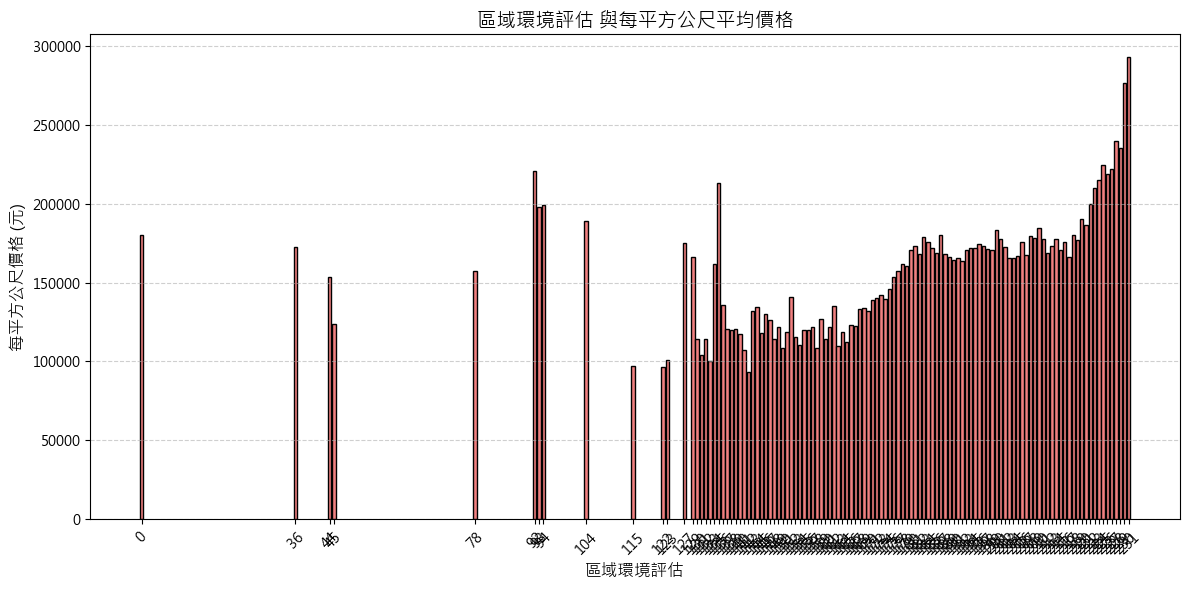

In [130]:
import matplotlib.pyplot as plt

# 使用所有的 '區域環境評估' 和對應的平均價格
area_avgPrice_all = area_avgPrice  # 這裡使用 area_avgPrice

# 提取資料以供繪圖
areas = list(area_avgPrice_all.keys())  # 改為區域環境評估
avg_prices = list(area_avgPrice_all.values())

# 繪製條形圖
plt.figure(figsize=(12, 6))

plt.bar(areas, avg_prices, color='lightcoral', edgecolor='black', width=0.8)
plt.title('區域環境評估 與每平方公尺平均價格', fontsize=14)  # 標題改為區域環境評估
plt.xlabel('區域環境評估', fontsize=12)  # x 軸標籤改為區域環境評估
plt.ylabel('每平方公尺價格 (元)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(areas, fontsize=10, rotation=45)  # 設定 x 軸刻度和旋轉角度
plt.tight_layout()  # 自動調整圖表避免擠壓
plt.show()

In [131]:
zone_avgPriceList = dict()
zone_avgPrice = dict()

# 第一步：將每個 '都市土地使用分區' 的 '單價元平方公尺' 加入到對應的清單中
for index, row in x_tmp_df.iterrows():
    zone = row['都市土地使用分區']
    if zone not in zone_avgPriceList:
        zone_avgPriceList[zone] = list()  # 初始化分區清單
        zone_avgPrice[zone] = 0  # 初始化分區平均價格
    zone_avgPriceList[zone].append(row['單價元平方公尺'])  # 將價格加入分區清單

# 第二步：計算每個分區的平均價格
for key in zone_avgPriceList.keys():
    zone_avgPrice[key] = np.mean(zone_avgPriceList[key])

# 檢查結果
print(zone_avgPrice)

{'住': 173028.32819794584, '第三種住宅區': 186758.36516644366, '第四種住宅區': 205439.0, '第三之一種住宅區': 207647.2147239264, '第四之一種住宅區': 246701.78888106966, '住宅用地': 206849.48571428572, '第一種商業區及第三種住宅區': 144753.0, '住宅區': 198595.09868421053, '第二種商業區及第三種住宅區': 217156.57142857142, '第三之二種住宅區': 198530.62711864407, '第二種住宅區': 149760.8104265403, '住商': 211750.0, '特定住宅區': 176973.88235294117, '特定休閒旅館住宅專用區': 104472.91304347826, '第二之一種住宅區': 163201.0, '第二類住宅用地': 138717.16666666666, '第二之二種住宅區': 236323.5, '市民住宅區': 144373.2857142857, '第四種住宅區及第參種商業區': 256687.0, '第三之二種住宅區及第三種住宅區': 192650.97297297296, '第三類住宅用地': 121229.33333333333, '第二種住宅區及第三種住宅區': 142280.85714285713, '住商混合區': 208916.88888888888, '第一種住宅區': 118667.14285714286, '第三之一種住宅區及第三種住宅區': 188140.57142857142, '第三之二種住宅區及第三之一種住宅區及第三種住宅區': 137833.4, '工商混合區': 136478.0, '第四種住宅區及道路用地': 257072.5, '住宅用地及道路用地': 167808.66666666666, '第四種住宅區及第四之一種住宅區': 131041.0, '第四之一種住宅區及第四種住宅區': 258085.0, '第四之一種住宅區及第四之一種住宅區': 234417.0, '第四種住宅區及第三種住宅區': 107025.0, '第三之二種住宅區及第三種住宅區及道路用地': 151093.0, '

In [132]:
# 先創建一個 '平均價格' 的新列，並初始化為 0
x_train_df['都市土地使用分區_平均價格'] = 0

# 使用 .loc 來直接修改 DataFrame
for index, row in x_train_df.iterrows():
    x_train_df.loc[index, '都市土地使用分區_平均價格'] = zone_avgPrice[row['都市土地使用分區']]

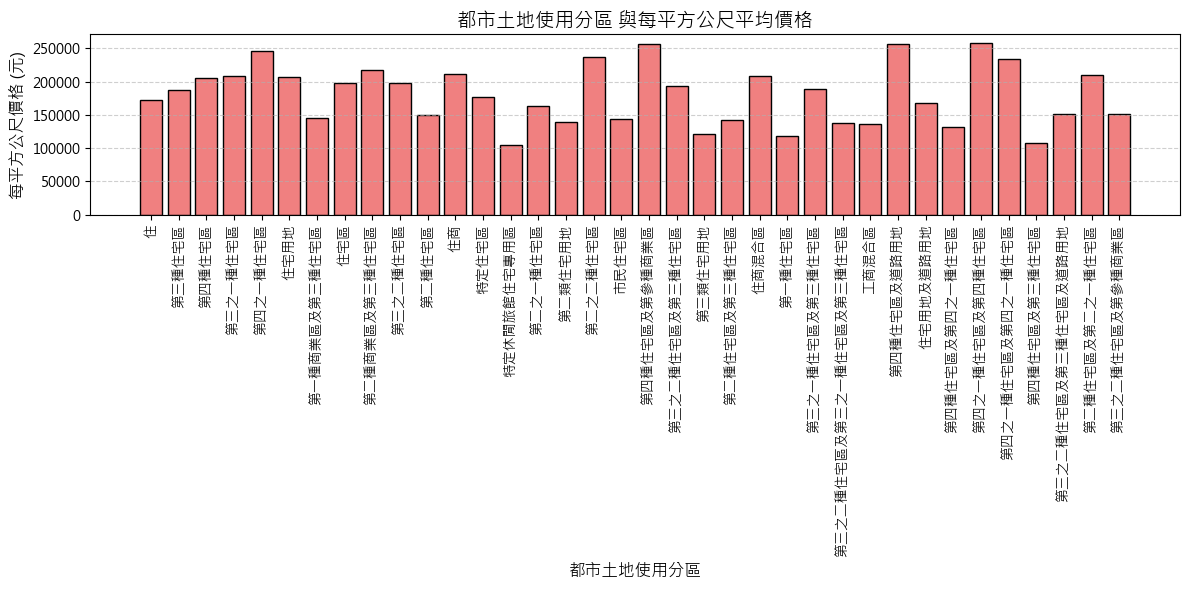

In [133]:
import matplotlib.pyplot as plt

# 提取資料以供繪圖
zones = list(zone_avgPrice.keys())
avg_prices = list(zone_avgPrice.values())

# 繪製條形圖
plt.figure(figsize=(12, 6))

plt.bar(zones, avg_prices, color='lightcoral', edgecolor='black', width=0.8)
plt.title('都市土地使用分區 與每平方公尺平均價格', fontsize=14)
plt.xlabel('都市土地使用分區', fontsize=12)
plt.ylabel('每平方公尺價格 (元)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(zones, fontsize=10, rotation=90)  # 設定 x 軸刻度和旋轉角度
plt.tight_layout()  # 自動調整圖表避免擠壓
plt.show()

In [134]:
district_avgPriceList = dict()  # 用來存儲每個鄉鎮市區的價格清單
district_avgPrice = dict()  # 用來存儲每個鄉鎮市區的平均價格

# 第一步：將每個 '鄉鎮市區' 的 '單價元平方公尺' 加入到對應的清單中
for index, row in x_tmp_df.iterrows():
    district = row['鄉鎮市區']  # 使用 '鄉鎮市區' 作為分區
    if district not in district_avgPriceList:
        district_avgPriceList[district] = list()  # 初始化鄉鎮市區清單
        district_avgPrice[district] = 0  # 初始化鄉鎮市區的平均價格
    district_avgPriceList[district].append(row['單價元平方公尺'])  # 將單價加入清單

# 第二步：計算每個鄉鎮市區的平均價格
for key in district_avgPriceList.keys():
    district_avgPrice[key] = np.mean(district_avgPriceList[key])

# 檢查結果
print(district_avgPrice)

{'文山區': 149261.08669527897, '中正區': 225341.22608695654, '內湖區': 174510.07763615294, '北投區': 144331.11980676328, '松山區': 204744.46357615895, '信義區': 201284.79778830963, '大安區': 243842.2768268775, '萬華區': 132038.4358353511, '南港區': 182209.13663366338, '士林區': 165733.35664737943, '大同區': 172207.91362126247, '中山區': 204597.98529411765}


In [135]:
# 先創建一個 '鄉鎮市區_平均價格' 的新列，並初始化為 0
x_train_df['鄉鎮市區_平均價格'] = 0

# 使用 .loc 來直接修改 DataFrame
for index, row in x_train_df.iterrows():
    x_train_df.loc[index, '鄉鎮市區_平均價格'] = district_avgPrice[row['鄉鎮市區']]# 假設 'district_avgPrice' 是你的字典

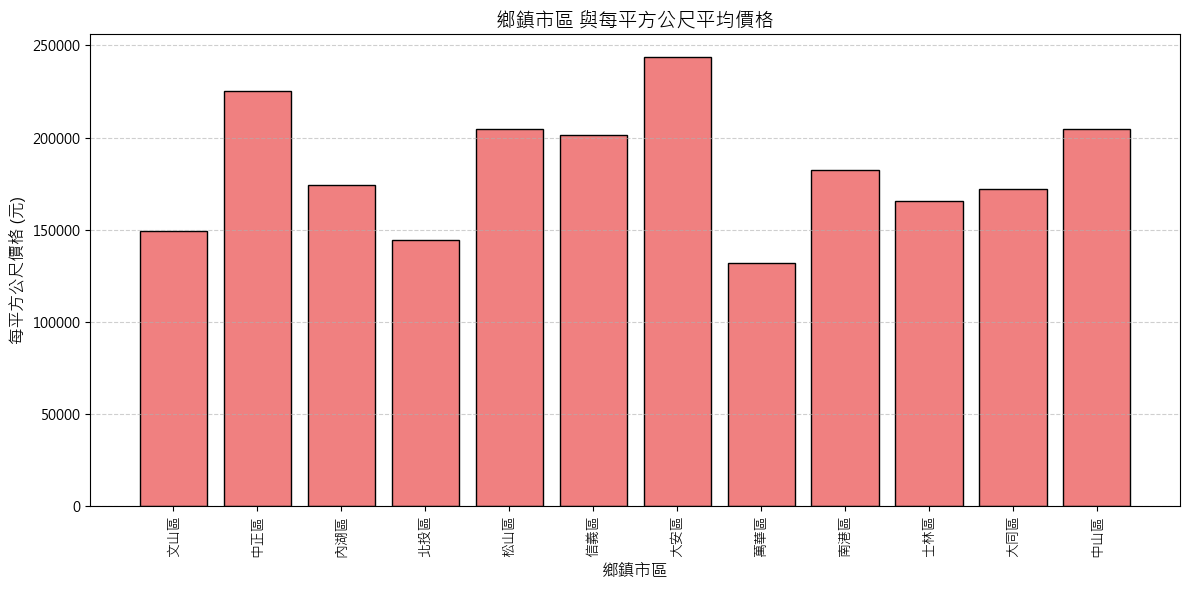

In [136]:
import matplotlib.pyplot as plt

# 提取資料以供繪圖
districts = list(district_avgPrice.keys())  # Assuming 'district_avgPrice' is the dictionary you're using now
avg_prices = list(district_avgPrice.values())

# 繪製條形圖
plt.figure(figsize=(12, 6))

plt.bar(districts, avg_prices, color='lightcoral', edgecolor='black', width=0.8)
plt.title('鄉鎮市區 與每平方公尺平均價格', fontsize=14)
plt.xlabel('鄉鎮市區', fontsize=12)
plt.ylabel('每平方公尺價格 (元)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(districts, fontsize=10, rotation=90)  # 設定 x 軸刻度和旋轉角度
plt.tight_layout()  # 自動調整圖表避免擠壓
plt.show()

In [137]:
x_train_df['鄰里便捷性指數'] = 0

for index, row in x_train_df.iterrows():
    new_value = 50 * row['地鐵站'] + 5 * row['超商'] + 1 * row['公園']
    x_train_df.at[index, '鄰里便捷性指數'] = new_value
    
print(x_train_df[['鄰里便捷性指數', '地鐵站', '超商', '公園']].head())

   鄰里便捷性指數  地鐵站    超商    公園
0       87  1.0   7.0   2.0
1      118  1.0  12.0   8.0
2       37  0.0   6.0   7.0
3      124  1.0  12.0  14.0
4      133  2.0   4.0  13.0


In [138]:
cat_features = ['交易標的', '建物型態','建物現況格局-隔間', '有無管理組織', '鄉鎮市區', '移轉層次項目', '主要建材']
non_cat_features = x_train_df.columns[~x_train_df.columns.isin(cat_features)]

In [139]:
x_train_df['交易季節'] = 0
x_test_df['交易季節'] = 0

for index, row in x_train_df.iterrows():
    new_value = ""
    if 4 <= row['交易月'] <= 6:
        new_value = '春'
    elif 7 <= row['交易月'] <= 9:
        new_value = '夏'
    elif 10 <= row['交易月'] <= 12:
        new_value = '秋'
    elif 1 <= row['交易月'] <= 3:
        new_value = '冬'
    x_train_df.at[index, '交易季節'] = new_value

for index, row in x_test_df.iterrows():
    new_value = ""
    if 4 <= row['交易月'] <= 6:
        new_value = '春'
    elif 7 <= row['交易月'] <= 9:
        new_value = '夏'
    elif 10 <= row['交易月'] <= 12:
        new_value = '秋'
    elif 1 <= row['交易月'] <= 3:
        new_value = '冬'
    x_test_df.at[index, '交易季節'] = new_value
    
print(x_train_df[['交易月', '交易季節']].head())
cat_features.append('交易季節')

   交易月 交易季節
0    8    夏
1    1    冬
2    4    春
3    6    春
4    4    春


In [140]:
feature_drop = ['路名', '主要用途', '都市土地使用分區']
x_train_df = x_train_df.drop(feature_drop, axis=1)
print(x_train_df[cat_features].iloc[0], "\n")
non_cat_features = x_train_df.columns[~x_train_df.columns.isin(cat_features)]
print(x_train_df[non_cat_features].iloc[0])

交易標的          房地(土地+建物)+車位
建物型態         華廈(10層含以下有電梯)
建物現況格局-隔間                有
有無管理組織                   有
鄉鎮市區                   文山區
移轉層次項目                   無
主要建材                鋼筋混凝土造
交易季節                     夏
Name: 0, dtype: object 

土地移轉總面積平方公尺          27.750000
土地數                   1.000000
建物數                   1.000000
車位數                   1.000000
移轉層次                  1.000000
總樓層數                  7.000000
建物移轉總面積平方公尺         133.430000
建物現況格局-房              3.000000
建物現況格局-廳              2.000000
建物現況格局-衛              2.000000
交易年                2019.000000
交易日                  31.000000
交易月                   8.000000
地鐵站                   1.000000
超商                    7.000000
公園                    2.000000
托兒所                  20.000000
國小                   20.000000
國中                   19.000000
高中職                  12.000000
大學                   17.000000
金融機構                 15.000000
醫院                   20.000000
大賣場                   7.000000
超市             

In [141]:
x_test_df = x_test_df.drop(feature_drop, axis=1)
print(x_test_df[cat_features].iloc[0], "\n")
non_cat_features = x_test_df.columns[~x_test_df.columns.isin(cat_features)]
print(x_test_df[non_cat_features].iloc[0])

交易標的               房地(土地+建物)
建物型態         住宅大樓(11層含以上有電梯)
建物現況格局-隔間                  有
有無管理組織                     有
鄉鎮市區                     文山區
移轉層次項目                     無
主要建材                  鋼筋混凝土造
交易季節                       夏
Name: 0, dtype: object 

Id                      0
土地移轉總面積平方公尺          65.8
土地數                   1.0
建物數                   1.0
車位數                   0.0
移轉層次                    3
總樓層數                 12.0
建築完成年月         1983-09-16
建物移轉總面積平方公尺        101.32
建物現況格局-房                3
建物現況格局-廳                2
建物現況格局-衛                1
交易年                  2020
交易日                    26
交易月                     7
地鐵站                   3.0
超商                    8.0
公園                   12.0
托兒所                  20.0
國小                   20.0
國中                   18.0
高中職                  13.0
大學                   16.0
金融機構                 16.0
醫院                   20.0
大賣場                   5.0
超市                   20.0
百貨公司                 20.0
警察局            

In [142]:
import pandas as pd

# 假設 'cat_features' 是需要進行 One-Hot Encoding 的類別特徵列表

# Perform One-Hot Encoding for x_train_df
x_train_encoded = pd.get_dummies(x_train_df[cat_features])

# Perform One-Hot Encoding for x_test_df (test data might have different categories)
x_test_encoded = pd.get_dummies(x_test_df[cat_features])

# Align columns: add missing columns in both train and test data
# This ensures both datasets have the same columns, filling missing ones with 0
x_train_encoded, x_test_encoded = x_train_encoded.align(x_test_encoded, join='outer', axis=1, fill_value=0)

# Extract non-categorical features
non_cat_features = x_train_df.columns[~x_train_df.columns.isin(cat_features)]

# Combine the non-categorical features with the encoded categorical features
x_df = pd.concat([x_train_df[non_cat_features], x_train_encoded], axis=1)

# Display the encoded train and test DataFrames
print("Training data with one-hot encoded features:")
print(x_df.iloc[0].to_string())

Training data with one-hot encoded features:
土地移轉總面積平方公尺                 27.750000
土地數                          1.000000
建物數                          1.000000
車位數                          1.000000
移轉層次                         1.000000
總樓層數                         7.000000
建物移轉總面積平方公尺                133.430000
建物現況格局-房                     3.000000
建物現況格局-廳                     2.000000
建物現況格局-衛                     2.000000
交易年                       2019.000000
交易日                         31.000000
交易月                          8.000000
地鐵站                          1.000000
超商                           7.000000
公園                           2.000000
托兒所                         20.000000
國小                          20.000000
國中                          19.000000
高中職                         12.000000
大學                          17.000000
金融機構                        15.000000
醫院                          20.000000
大賣場                          7.000000
超市                          20.000000
百貨公司 

In [143]:
def create_interaction_features(df, features1, features2, suffix):
    """生成交互特徵"""
    for f1 in features1:
        for f2 in features2:
            df[f"{f1}_{f2}_{suffix}"] = df[f1] * df[f2]
            
# 每房平均面積
x_df["每房平均面積"] = x_df["建物移轉總面積平方公尺"] / (x_df["建物現況格局-房"] + 1)

# 土地建築比例
x_df["土地建築比例"] = x_df["土地移轉總面積平方公尺"] / (x_df["建物移轉總面積平方公尺"] + 1)

# 樓層價格交互
x_df["樓層_價格交互"] = x_df["總樓層數"] * x_df["屋齡_平均價格"]

# 單位面積價格
x_df["單位面積價格"] = x_df["屋齡_平均價格"] / (x_df["建物移轉總面積平方公尺"] + 1)

# 土地與房價交互
x_df["土地_價格交互"] = x_df["土地移轉總面積平方公尺"] * x_df["屋齡_平均價格"]

# 房齡與面積交互
x_df["房齡_面積交互"] = (x_df["屋齡"]) * x_df["建物移轉總面積平方公尺"]

# 年份和地區價格交互
x_df["年份_區域價格交互"] = x_df["建築年"] * x_df["路名_平均價格"]

distance_features = ["內湖區", "北投區", "松山區", "信義區", "大安區", "萬華區", "南港區", "士林區", "大同區", "中山區"]
# 要進行交互的其他特徵
interaction_features = ["鄰里便捷性指數", "建物移轉總面積平方公尺"]

# 遍历每个距離特徵，与其他交互特徵生成交互项
for dist_feature in distance_features:
    for inter_feature in interaction_features:
        # 生成交互特徵名稱
        interaction_name = f"距離_{dist_feature}_{inter_feature}_交互"
        # 計算交互值
        x_df[interaction_name] = (
            x_df[f"距離_{dist_feature}"] * x_df[inter_feature]
        )

# 距離特徵與面積交互
for dist_feature in distance_features:
    x_df[f"{dist_feature}_面積交互"] = (
        x_df[f"距離_{dist_feature}"] * x_df["建物移轉總面積平方公尺"]
    )

# 環境特徵交互
environment_features = ["超商", "公園", "醫院", "國小", "鄰里便捷性指數"]
for i, feature1 in enumerate(environment_features):
    for feature2 in environment_features[i + 1:]:
        x_df[f"{feature1}_{feature2}_交互"] = x_df[feature1] * x_df[feature2]

# 管理與房數交互
x_df["管理_房數交互"] = x_df["有無管理組織_有"] * x_df["建物現況格局-房"]

# 管理與樓層交互
x_df["管理_樓層交互"] = x_df["有無管理組織_有"] * x_df["總樓層數"]

year_feature = "建築年"
# 年份與建物移轉面積交互
x_df["年份_面積交互"] = x_df[year_feature] * x_df["建物移轉總面積平方公尺"]

# 年份與環境特徵交互
environment_features = ["超商", "公園", "醫院", "國小", "鄰里便捷性指數"]
for feature in environment_features:
    x_df[f"年份_{feature}_交互"] = x_df[year_feature] * x_df[feature]


print(x_df)
print(x_df.iloc[0].to_string())

      土地移轉總面積平方公尺  土地數  建物數  車位數  移轉層次  總樓層數  建物移轉總面積平方公尺  建物現況格局-房  建物現況格局-廳  \
0           27.75  1.0  1.0  1.0     1   7.0       133.43         3         2   
1            9.57  1.0  1.0  0.0     5   6.0        40.34         1         1   
2            9.51  1.0  1.0  0.0     1   7.0        70.61         1         1   
3           23.67  1.0  1.0  1.0    10  15.0       143.83         3         2   
4           22.50  1.0  1.0  0.0     2   5.0        83.73         2         1   
...           ...  ...  ...  ...   ...   ...          ...       ...       ...   
9455        29.01  1.0  1.0  0.0     3   6.0       130.96         3         2   
9456        20.48  2.0  1.0  0.0     2   5.0        66.24         2         2   
9457       136.19  1.0  1.0  3.0     3   9.0       433.73         4         2   
9458        39.45  1.0  1.0  1.0    11  12.0       254.33         0         1   
9459        30.98  1.0  1.0  2.0     2  18.0       288.60         4         2   

      建物現況格局-衛  ...  醫院_鄰里便

In [144]:
x_df["土地移轉總面積_對數"] = np.log(x_df["土地移轉總面積平方公尺"] + 1)
x_df["建物移轉總面積_平方根"] = np.sqrt(x_df["建物移轉總面積平方公尺"])

x_df["樓層_價格交互_平方"] = x_df["樓層_價格交互"] ** 2
x_df["樓層_價格交互_立方"] = x_df["樓層_價格交互"] ** 3

In [145]:
feature_drop = ['鄉鎮市區_平均價格', '區域環境評估_平均價格']
x_df = x_df.drop(feature_drop, axis=1)
print(x_df)

      土地移轉總面積平方公尺  土地數  建物數  車位數  移轉層次  總樓層數  建物移轉總面積平方公尺  建物現況格局-房  建物現況格局-廳  \
0           27.75  1.0  1.0  1.0     1   7.0       133.43         3         2   
1            9.57  1.0  1.0  0.0     5   6.0        40.34         1         1   
2            9.51  1.0  1.0  0.0     1   7.0        70.61         1         1   
3           23.67  1.0  1.0  1.0    10  15.0       143.83         3         2   
4           22.50  1.0  1.0  0.0     2   5.0        83.73         2         1   
...           ...  ...  ...  ...   ...   ...          ...       ...       ...   
9455        29.01  1.0  1.0  0.0     3   6.0       130.96         3         2   
9456        20.48  2.0  1.0  0.0     2   5.0        66.24         2         2   
9457       136.19  1.0  1.0  3.0     3   9.0       433.73         4         2   
9458        39.45  1.0  1.0  1.0    11  12.0       254.33         0         1   
9459        30.98  1.0  1.0  2.0     2  18.0       288.60         4         2   

      建物現況格局-衛  ...    年份_面

In [146]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x_train, x_val, y_train, y_val = train_test_split(x_df, y, test_size=0.1, random_state=42)
# Function to apply Lasso regularization for feature selection
model = XGBRegressor(n_estimators=100, random_state=42)

model.fit(x_train, y_train)

# Step 5: Predict on the test set
y_pred = model.predict(x_val)

rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"RMSE on test set: {rmse}")

RMSE on test set: 32762.78341209021


In [147]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb
import numpy as np

# Initialize XGBoost model
model = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')  # 5-fold cross-validation

# Convert negative MSE to positive and calculate RMSE
cv_rmse_scores = np.sqrt(-cv_scores)

# Print cross-validation results
print("Cross-validation RMSE scores:", cv_rmse_scores)
print("Mean RMSE across folds:", np.mean(cv_rmse_scores))

Cross-validation RMSE scores: [32073.32891858 32977.70128134 32298.76162102 30050.60566515
 32821.16085842]
Mean RMSE across folds: 32044.31166890014


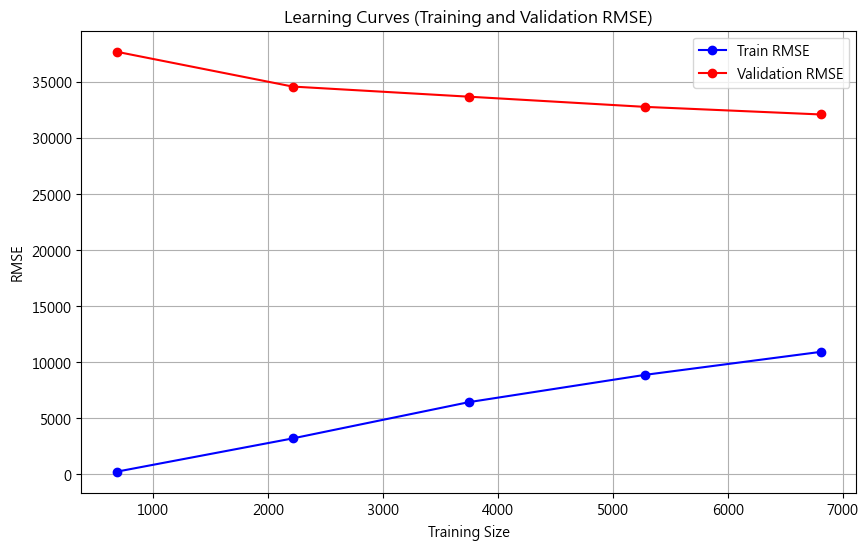

In [148]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import xgboost as xgb
import numpy as np

# Initialize XGBoost model
model = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Get the learning curve
train_sizes, train_scores, val_scores = learning_curve(model, x_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Convert negative MSE to positive
train_rmse = np.sqrt(-train_scores)
val_rmse = np.sqrt(-val_scores)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_rmse, axis=1), label='Train RMSE', color='blue', marker='o')
plt.plot(train_sizes, np.mean(val_rmse, axis=1), label='Validation RMSE', color='red', marker='o')

plt.title('Learning Curves (Training and Validation RMSE)')
plt.xlabel('Training Size')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()


In [149]:
from sklearn.model_selection import RandomizedSearchCV

# Define the XGBoost model
model = XGBRegressor(n_estimators=100, random_state=42)

# Define hyperparameter space for search
param_dist = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'n_estimators': [100, 200, 300, 400],
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=3, verbose=2, random_state=42)
random_search.fit(x_train, y_train)

# Best model after hyperparameter tuning
print("Best parameters:", random_search.best_params_)
best_model = random_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(x_val)
print("Validation RMSE:", np.sqrt(mean_squared_error(y_val, y_pred)))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=0.6; total time=  34.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=0.6; total time=  35.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=0.6; total time=  35.3s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.8; total time=   8.6s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.8; total time=   8.4s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.8; total time=   8.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=400, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=400, subsample=0.8; total time=   4.8s
[CV] END colsamp

In [150]:
x_test_df = pd.read_csv("datas/X_test.csv")

In [151]:
x_tmp_df = x_test_df.copy()
print(x_test_df)

        Id 鄉鎮市區          交易標的      路名  土地移轉總面積平方公尺       都市土地使用分區  土地數  建物數  \
0        0  文山區     房地(土地+建物)   萬美街二段        65.80        第二類住宅用地  1.0  1.0   
1        1  文山區     房地(土地+建物)   萬美街二段        61.90        第二類住宅用地  1.0  1.0   
2        2  文山區  房地(土地+建物)+車位     萬寧街        37.67        第三類住宅用地  1.0  1.0   
3        3  文山區     房地(土地+建物)     萬利街        38.60        第三類住宅用地  1.0  1.0   
4        4  大安區     房地(土地+建物)   大安路一段        20.75  第四種住宅區及第參種商業區  1.0  1.0   
...    ...  ...           ...     ...          ...            ...  ...  ...   
2361  2361  大安區     房地(土地+建物)   辛亥路二段        12.79       第三之二種住宅區  3.0  1.0   
2362  2362  大安區     房地(土地+建物)     延吉街        24.40         第四種住宅區  1.0  1.0   
2363  2363  大安區     房地(土地+建物)  羅斯福路三段        13.93         第三種住宅區  1.0  1.0   
2364  2364  信義區     房地(土地+建物)  忠孝東路五段         7.49         第三種住宅區  1.0  1.0   
2365  2365  大安區     房地(土地+建物)   大安路一段        35.00         第四種住宅區  1.0  1.0   

      車位數  移轉層次  ...    大學  金融機構    醫院   大賣場    超市 

In [152]:
build_features = ['建築年', '建築月', '建築日']
x_test_df['建築完成年月'] = pd.to_datetime(x_test_df['建築完成年月'])

new_df = pd.DataFrame()
new_df['建築年'] = x_test_df['建築完成年月'].dt.year
new_df['建築月'] = x_test_df['建築完成年月'].dt.month
new_df['建築日'] = x_test_df['建築完成年月'].dt.day

print(new_df)
x_test_df = pd.concat([x_test_df, new_df], axis=1)
x_test_df.drop('建築完成年月', axis=1, inplace=True)

print(x_test_df)

       建築年  建築月  建築日
0     1983    9   16
1     1983    9   16
2     1993   12   21
3     1997    3   18
4     1982    4   23
...    ...  ...  ...
2361  1972    1   25
2362  1969    2    5
2363  1967    3   30
2364  1998    8   10
2365  1975    5   21

[2366 rows x 3 columns]
        Id 鄉鎮市區          交易標的      路名  土地移轉總面積平方公尺       都市土地使用分區  土地數  建物數  \
0        0  文山區     房地(土地+建物)   萬美街二段        65.80        第二類住宅用地  1.0  1.0   
1        1  文山區     房地(土地+建物)   萬美街二段        61.90        第二類住宅用地  1.0  1.0   
2        2  文山區  房地(土地+建物)+車位     萬寧街        37.67        第三類住宅用地  1.0  1.0   
3        3  文山區     房地(土地+建物)     萬利街        38.60        第三類住宅用地  1.0  1.0   
4        4  大安區     房地(土地+建物)   大安路一段        20.75  第四種住宅區及第參種商業區  1.0  1.0   
...    ...  ...           ...     ...          ...            ...  ...  ...   
2361  2361  大安區     房地(土地+建物)   辛亥路二段        12.79       第三之二種住宅區  3.0  1.0   
2362  2362  大安區     房地(土地+建物)     延吉街        24.40         第四種住宅區  1.0  1.0   
2363  2363  

In [153]:
city_list = x_train_df['鄉鎮市區'].unique()

# 對每個市區計算距離並新增欄位
for city in city_list:
    # 取得該市區的資料
    x_city_df = x_train_df[x_train_df['鄉鎮市區'] == city]
    
    # 計算該市區的 anchor 為橫坐標和縱坐標的平均值
    anchor = [x_city_df['橫坐標'].median(), x_city_df['縱坐標'].median()]
    
    # 動態生成欄位名稱
    distance_column = f'距離_{city}'
    
    # 計算每個樣本點到該市區 anchor 的距離，並存入新的欄位
    x_test_df[distance_column] = x_test_df.apply(
        lambda row: cal_distance(row['橫坐標'], row['縱坐標'], anchor), axis=1
    )

# 檢查結果（顯示前幾行）
print(x_test_df.head())

   Id 鄉鎮市區          交易標的     路名  土地移轉總面積平方公尺       都市土地使用分區  土地數  建物數  車位數  \
0   0  文山區     房地(土地+建物)  萬美街二段        65.80        第二類住宅用地  1.0  1.0  0.0   
1   1  文山區     房地(土地+建物)  萬美街二段        61.90        第二類住宅用地  1.0  1.0  0.0   
2   2  文山區  房地(土地+建物)+車位    萬寧街        37.67        第三類住宅用地  1.0  1.0  1.0   
3   3  文山區     房地(土地+建物)    萬利街        38.60        第三類住宅用地  1.0  1.0  0.0   
4   4  大安區     房地(土地+建物)  大安路一段        20.75  第四種住宅區及第參種商業區  1.0  1.0  0.0   

   移轉層次  ...    距離_內湖區    距離_北投區    距離_松山區    距離_信義區    距離_大安區    距離_萬華區  \
0     3  ...  0.074908  0.131829  0.051325  0.034432  0.035298  0.067649   
1     2  ...  0.075335  0.132325  0.051823  0.034883  0.035753  0.067935   
2     5  ...  0.073911  0.131889  0.050910  0.033567  0.035808  0.068821   
3     3  ...  0.076226  0.134532  0.053580  0.036030  0.038201  0.070339   
4     8  ...  0.056567  0.097003  0.023187  0.024166  0.007029  0.047498   

     距離_南港區    距離_士林區    距離_大同區    距離_中山區  
0  0.056432  0.103929  0.07664

In [154]:
x_test_df['屋齡'] = x_test_df.apply(lambda row: row['交易年'] - row['建築年'] + 1, axis=1)

# Check the new column
print(x_test_df[['交易年', '建築年', '屋齡']].head())

    交易年   建築年  屋齡
0  2020  1983  38
1  2020  1983  38
2  2020  1993  28
3  2020  1997  24
4  2020  1982  39


In [155]:
# 新增 '區域環境評估' 欄位並設初始值為 0
x_test_df['區域環境評估'] = 0

# 逐列計算區域環境評估分數
# 設定各類設施的權重
weights = {
    '托兒所': 1, '國小': 1, '國中': 1, '高中職': 1, '大學': 1,
    '金融機構': 1, '醫院': 1, '大賣場': 1, '超市': 1, '百貨公司': 1,
    '警察局': 1, '消防局': 1
}

# 逐列計算帶權重的區域環境評估
for index, row in x_test_df.iterrows():
    region_value = sum(row[facility] * weight for facility, weight in weights.items())
    x_test_df.at[index, '區域環境評估'] = region_value

# 檢查結果
print(x_test_df['區域環境評估'].head())

0    205
1    205
2    201
3    203
4    225
Name: 區域環境評估, dtype: int64


In [156]:
x_tmp_df = x_train_df.copy()
x_tmp_df['單價元平方公尺'] = y_train_df['單價元平方公尺']
# 初始化字典
town_avgPriceList = dict()
town_avgPrice = dict()

# 第一步：將每個 '鄉鎮市區' 的 '單價元平方公尺' 加入到對應的清單中
for index, row in x_tmp_df.iterrows():
    town = row['鄉鎮市區']
    if town not in town_avgPriceList:
        town_avgPriceList[town] = list()  # 初始化鄉鎮市區清單
        town_avgPrice[town] = 0  # 初始化鄉鎮市區平均價格
    town_avgPriceList[town].append(row['單價元平方公尺'])  # 將價格加入鄉鎮市區清單

# 第二步：計算每個鄉鎮市區的平均價格
for key in town_avgPriceList.keys():
    town_avgPrice[key] = np.mean(town_avgPriceList[key])

# 檢查結果
print(town_avgPrice)

{'文山區': 149261.08669527897, '中正區': 225341.22608695654, '內湖區': 174510.07763615294, '北投區': 144331.11980676328, '松山區': 204744.46357615895, '信義區': 201284.79778830963, '大安區': 243842.2768268775, '萬華區': 132038.4358353511, '南港區': 182209.13663366338, '士林區': 165733.35664737943, '大同區': 172207.91362126247, '中山區': 204597.98529411765}


In [157]:
x_test_df['路名_平均價格'] = 0  # 創建新列並初始化為 0

# 計算所有路名的平均價格
overall_avgPrice = np.mean(list(place_avgPrice.values()))  # 轉換為 list

# 使用 .loc 來直接修改 DataFrame
for index, row in x_test_df.iterrows():
    if row['路名'] in place_avgPrice:
        # 如果路名在 place_avgPrice 中，則使用該路名的平均價格
        x_test_df.loc[index, '路名_平均價格'] = place_avgPrice[row['路名']]
    elif row['鄉鎮市區'] in town_avgPrice:
        # 如果路名不在 place_avgPrice 中，則使用鄉鎮市區的平均價格
        x_test_df.loc[index, '路名_平均價格'] = town_avgPrice[row['鄉鎮市區']]
    else:
        # 如果鄉鎮市區也沒有對應的平均價格，則可以設定為一個預設值，或使用全體的平均價格
        x_test_df.loc[index, '路名_平均價格'] = overall_avgPrice  # overall_avgPrice 是全體的平均價格

In [158]:
# 先創建一個 '平均價格' 的新列，並初始化為 0
x_test_df['屋齡_平均價格'] = 0

# 使用 .loc 來直接修改 DataFrame
for index, row in x_test_df.iterrows():
    x_test_df.loc[index, '屋齡_平均價格'] = age_avgPrice[row['屋齡']]

In [159]:
# 先創建一個 '主要用途_平均價格' 的新列，並初始化為 0
x_test_df['主要用途_平均價格'] = 0

# 假設 usage_avgPrice 已經定義並儲存了每個 '主要用途' 的平均價格
# 計算所有 '主要用途' 的平均價格
overall_avgPrice = np.mean(list(usage_avgPrice.values()))  # 假設 usage_avgPrice 是字典，轉換為 list

# 使用 .loc 來直接修改 DataFrame
for index, row in x_test_df.iterrows():
    if row['主要用途'] in usage_avgPrice:
        # 如果 '主要用途' 在 usage_avgPrice 中，則使用該 '主要用途' 的平均價格
        x_test_df.loc[index, '主要用途_平均價格'] = usage_avgPrice[row['主要用途']]
    else:
        # 如果 '主要用途' 不在 usage_avgPrice 中，則使用全體的平均價格
        x_test_df.loc[index, '主要用途_平均價格'] = overall_avgPrice  # 假設 overall_avgPrice 是全體的平均價格


In [160]:
x_test_df['區域環境評估_平均價格'] = 0 
sorted_area_avgPrice = sorted(area_avgPrice.items(), key=lambda x: x[0])
print(sorted_area_avgPrice)

# 使用 .loc 來直接修改 DataFrame
for index, row in x_test_df.iterrows():
    if row['區域環境評估'] in area_avgPrice.keys():      
        x_test_df.loc[index, '區域環境評估_平均價格'] = area_avgPrice[row['區域環境評估']]  # 使用區域環境評估作為 key
    else:
        found_at = 0
        for i in range(len(sorted_area_avgPrice)):
            if row['區域環境評估'] < sorted_area_avgPrice[i][0]:
                break
            found_at = i
        if found_at != len(sorted_area_avgPrice)-1:
            x_test_df.loc[index, '區域環境評估_平均價格'] = sorted_area_avgPrice[i][1] + sorted_area_avgPrice[i+1][1]
        else:
            x_test_df.loc[index, '區域環境評估_平均價格'] = sorted_area_avgPrice[i][1]

[(0, 180095.28235294117), (36, 172569.0), (44, 153631.0), (45, 123436.0), (78, 157109.0), (92, 220448.0), (93, 197963.5), (94, 198890.75), (104, 188973.0), (115, 97332.0), (122, 96426.0), (123, 101078.0), (127, 174896.0), (129, 166082.66666666666), (130, 114313.0), (131, 104176.0), (132, 114522.33333333333), (133, 100288.0), (134, 161660.66666666666), (135, 212976.5), (136, 135579.0), (137, 120428.25), (138, 119926.5), (139, 120733.0), (140, 117449.33333333333), (141, 107486.66666666667), (142, 93302.75), (143, 131990.0), (144, 134547.2857142857), (145, 118211.6), (146, 130080.23076923077), (147, 126307.9), (148, 114075.35714285714), (149, 122087.06666666667), (150, 108326.85714285714), (151, 118448.66666666667), (152, 141081.36363636365), (153, 115466.81818181818), (154, 110666.11111111111), (155, 119699.14285714286), (156, 119628.14285714286), (157, 121642.22222222222), (158, 108711.54545454546), (159, 126618.2), (160, 113933.55555555556), (161, 122077.375), (162, 135349.75), (163, 1

In [161]:
# 先創建一個 '都市土地使用分區_平均價格' 的新列，並初始化為 0
x_test_df['都市土地使用分區_平均價格'] = 0

# 計算所有 '都市土地使用分區' 的平均價格
overall_avgPrice = np.mean(list(zone_avgPrice.values()))  # 假設 zone_avgPrice 是字典，轉換為 list

# 使用 .loc 來直接修改 DataFrame
for index, row in x_test_df.iterrows():
    if row['都市土地使用分區'] in zone_avgPrice:
        # 如果 '都市土地使用分區' 在 zone_avgPrice 中，則使用該 '都市土地使用分區' 的平均價格
        x_test_df.loc[index, '都市土地使用分區_平均價格'] = zone_avgPrice[row['都市土地使用分區']]
    else:
        # 如果 '都市土地使用分區' 不在 zone_avgPrice 中，則使用全體的平均價格
        x_test_df.loc[index, '都市土地使用分區_平均價格'] = overall_avgPrice  # 假設 overall_avgPrice 是全體的平均價格

In [162]:
# 先創建一個 '鄉鎮市區_平均價格' 的新列，並初始化為 0
x_test_df['鄉鎮市區_平均價格'] = 0

# 假設 'district_avgPrice' 是你的字典，overall_average 是你設定的整體平均價格
overall_average = np.mean(list(district_avgPrice.values()))  # 直接從字典的 values 取得

# 使用 .loc 來直接修改 DataFrame
for index, row in x_test_df.iterrows():
    # 使用 .get() 確保即使找不到對應的 '鄉鎮市區' 也不會報錯，若沒有找到則回傳 overall_average
    x_test_df.loc[index, '鄉鎮市區_平均價格'] = district_avgPrice.get(row['鄉鎮市區'], overall_average)

In [163]:
x_test_df['鄰里便捷性指數'] = 0

for index, row in x_test_df.iterrows():
    new_value = 50 * row['地鐵站'] + 5 * row['超商'] + 1 * row['公園']
    x_test_df.at[index, '鄰里便捷性指數'] = new_value
    
print(x_test_df[['鄰里便捷性指數', '地鐵站', '超商', '公園']].head())

   鄰里便捷性指數  地鐵站    超商    公園
0      202  3.0   8.0  12.0
1      101  1.0   8.0  11.0
2       96  1.0   7.0  11.0
3       92  1.0   6.0  12.0
4      190  2.0  15.0  15.0


In [164]:
feature_drop = ['路名', '主要用途', '都市土地使用分區']
x_test_df = x_test_df.drop(feature_drop, axis=1)

In [165]:
x_test_df_concat = pd.concat([x_test_df[non_cat_features], x_test_encoded], axis=1)

In [166]:
# Ensure same transformation order on test setfrom sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define the model with a reasonable starting point for hyperparameters
model = XGBRegressor(
    subsample=0.6, 
    n_estimators=300, 
    max_depth=5, 
    learning_rate=0.05, 
    colsample_bytree=0.8, 
    random_state=42
)

# Train the model
model.fit(x_train, y_train)

# Print model performance (optional)
print("Model training completed.")

Model training completed.


In [167]:
    # 每房平均面積
    x_test_df_concat["每房平均面積"] = x_test_df_concat["建物移轉總面積平方公尺"] / (x_test_df_concat["建物現況格局-房"] + 1)

    # 土地建築比例
    x_test_df_concat["土地建築比例"] = x_test_df_concat["土地移轉總面積平方公尺"] / (x_test_df_concat["建物移轉總面積平方公尺"] + 1)

    # 樓層價格交互
    x_test_df_concat["樓層_價格交互"] = x_test_df_concat["總樓層數"] * x_test_df_concat["屋齡_平均價格"]

    # 單位面積價格
    x_test_df_concat["單位面積價格"] = x_test_df_concat["屋齡_平均價格"] / (x_test_df_concat["建物移轉總面積平方公尺"] + 1)

    # 土地與房價交互
    x_test_df_concat["土地_價格交互"] = x_test_df_concat["土地移轉總面積平方公尺"] * x_test_df_concat["屋齡_平均價格"]

    # 房齡與面積交互
    x_test_df_concat["房齡_面積交互"] = (x_test_df_concat["屋齡"]) * x_test_df_concat["建物移轉總面積平方公尺"]

    # 年份和地區價格交互
    x_test_df_concat["年份_區域價格交互"] = x_test_df_concat["建築年"] * x_test_df_concat["路名_平均價格"]

    # 所有距離特徵名稱
    distance_features = ["內湖區", "北投區", "松山區", "信義區", "大安區", "萬華區", "南港區", "士林區", "大同區", "中山區"]
    # 要進行交互的其他特徵
    interaction_features = ["鄰里便捷性指數", "建物移轉總面積平方公尺"]

    # 遍历每个距離特徵，与其他交互特徵生成交互项
    for dist_feature in distance_features:
        for inter_feature in interaction_features:
            # 生成交互特徵名稱
            interaction_name = f"距離_{dist_feature}_{inter_feature}_交互"
            # 計算交互值
            x_test_df_concat[interaction_name] = (
                x_test_df_concat[f"距離_{dist_feature}"] * x_test_df_concat[inter_feature]
            )

    # 距离与面积交互
    for dist_feature in distance_features:
        x_test_df_concat[f"{dist_feature}_面積交互"] = (
            x_test_df_concat[f"距離_{dist_feature}"] * x_test_df_concat["建物移轉總面積平方公尺"]
        )

    # 环境特征交互s
    environment_features = ["超商", "公園", "醫院", "國小", "鄰里便捷性指數"]
    for i, feature1 in enumerate(environment_features):
        for feature2 in environment_features[i + 1:]:
            x_test_df_concat[f"{feature1}_{feature2}_交互"] = x_test_df_concat[feature1] * x_test_df_concat[feature2]

    # 管理與房數交互
    x_test_df_concat["管理_房數交互"] = x_test_df_concat["有無管理組織_有"] * x_test_df_concat["建物現況格局-房"]

    # 管理與樓層交互
    x_test_df_concat["管理_樓層交互"] = x_test_df_concat["有無管理組織_有"] * x_test_df_concat["總樓層數"]


    year_feature = "建築年"
    # 年份與建物移轉面積交互
    x_test_df_concat["年份_面積交互"] = x_test_df_concat[year_feature] * x_test_df_concat["建物移轉總面積平方公尺"]

    # 年份與環境特徵交互
    environment_features = ["超商", "公園", "醫院", "國小", "鄰里便捷性指數"]
    for feature in environment_features:
        x_test_df_concat[f"年份_{feature}_交互"] = x_test_df_concat[year_feature] * x_test_df_concat[feature]


    # 打印數據集及第一行
    print(x_test_df_concat)
    print(x_test_df_concat.iloc[0].to_string())

      土地移轉總面積平方公尺  土地數  建物數  車位數  移轉層次  總樓層數  建物移轉總面積平方公尺  建物現況格局-房  建物現況格局-廳  \
0           65.80  1.0  1.0  0.0     3  12.0       101.32         3         2   
1           61.90  1.0  1.0  0.0     2   5.0       104.90         3         2   
2           37.67  1.0  1.0  1.0     5   7.0       158.18         3         2   
3           38.60  1.0  1.0  0.0     3   5.0       108.19         3         2   
4           20.75  1.0  1.0  0.0     8  10.0       136.15         2         1   
...           ...  ...  ...  ...   ...   ...          ...       ...       ...   
2361        12.79  3.0  1.0  0.0    13  26.0       192.11         4         2   
2362        24.40  1.0  1.0  0.0     7   7.0       128.02         3         3   
2363        13.93  1.0  1.0  0.0     3   7.0        65.70         2         2   
2364         7.49  1.0  1.0  0.0     3   7.0        32.99         1         1   
2365        35.00  1.0  1.0  0.0     1   6.0       156.41         3         2   

      建物現況格局-衛  ...  醫院_鄰里便

In [168]:
x_test_df_concat["土地移轉總面積_對數"] = np.log(x_test_df_concat["土地移轉總面積平方公尺"] + 1)
x_test_df_concat["建物移轉總面積_平方根"] = np.sqrt(x_test_df_concat["建物移轉總面積平方公尺"])

x_test_df_concat["樓層_價格交互_平方"] = x_test_df_concat["樓層_價格交互"] ** 2
x_test_df_concat["樓層_價格交互_立方"] = x_test_df_concat["樓層_價格交互"] ** 3


In [169]:
feature_drop = ['鄉鎮市區_平均價格', '區域環境評估_平均價格']
x_test_df_concat = x_test_df_concat.drop(feature_drop, axis=1)

In [170]:
from xgboost import XGBRegressor

# Step 4: Train the XGBRegressor model using the selected features
model = XGBRegressor(
    subsample=0.7, 
    scale_pos_weight=2.5, 
    n_estimators=400, 
    min_child_weight=3, 
    max_depth=5, 
    max_delta_step=0, 
    learning_rate=0.1, 
    gamma=0.3, 
    colsample_bytree=0.6
)

# Train the model on the selected training data
model.fit(x_df, y)

# Step 5: Predict on the test set
y_pred = model.predict(x_test_df_concat)

# Optionally, print model performance
print("Model training completed with selected features.")


Model training completed with selected features.


In [171]:
print(len(y_pred))

2366


In [172]:
# Assuming 'y_pred' is the predicted output from your model
# and 'x_test_df' contains the columns 'ID' and '單價元平方公尺'

# Create a DataFrame with predictions, 'ID' and '單價元平方公尺'
predictions_df = pd.DataFrame({
    'Id': x_test_df['Id'],  # Add the ID column from x_test_df
    '單價元平方公尺': y_pred  # Add '單價元平方公尺' column
})

# Write the DataFrame to an Excel file
predictions_df.to_csv('predictions.csv', index=False)

print("Predictions saved to 'predictions.csv'")

Predictions saved to 'predictions.csv'


In [173]:
# Find features present in x_df but missing in x_test_df_concat
missing_in_test = set(x_df.columns) - set(x_test_df_concat.columns)
print("Features in training set but missing in testing set:", missing_in_test)

# Find features present in x_test_df_concat but missing in x_df
missing_in_train = set(x_test_df_concat.columns) - set(x_df.columns)
print("Features in testing set but missing in training set:", missing_in_train)


Features in training set but missing in testing set: set()
Features in testing set but missing in training set: set()


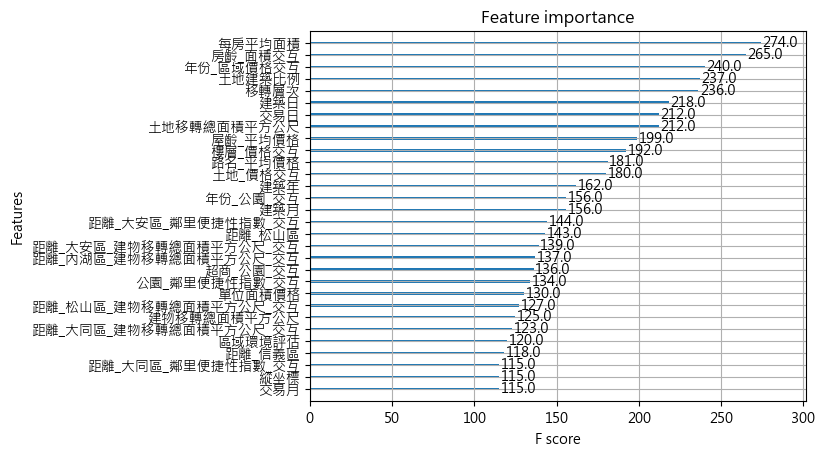

Feature importance (sorted): [('每房平均面積', 274.0), ('房齡_面積交互', 265.0), ('年份_區域價格交互', 240.0), ('土地建築比例', 237.0), ('移轉層次', 236.0), ('建築日', 218.0), ('土地移轉總面積平方公尺', 212.0), ('交易日', 212.0), ('屋齡_平均價格', 199.0), ('樓層_價格交互', 192.0), ('路名_平均價格', 181.0), ('土地_價格交互', 180.0), ('建築年', 162.0), ('建築月', 156.0), ('年份_公園_交互', 156.0), ('距離_大安區_鄰里便捷性指數_交互', 144.0), ('距離_松山區', 143.0), ('距離_大安區_建物移轉總面積平方公尺_交互', 139.0), ('距離_內湖區_建物移轉總面積平方公尺_交互', 137.0), ('超商_公園_交互', 136.0), ('公園_鄰里便捷性指數_交互', 134.0), ('單位面積價格', 130.0), ('距離_松山區_建物移轉總面積平方公尺_交互', 127.0), ('建物移轉總面積平方公尺', 125.0), ('距離_大同區_建物移轉總面積平方公尺_交互', 123.0), ('區域環境評估', 120.0), ('距離_信義區', 118.0), ('交易月', 115.0), ('縱坐標', 115.0), ('距離_大同區_鄰里便捷性指數_交互', 115.0), ('距離_大安區', 114.0), ('屋齡', 114.0), ('距離_北投區_鄰里便捷性指數_交互', 114.0), ('距離_大同區', 113.0), ('距離_中正區', 110.0), ('距離_信義區_鄰里便捷性指數_交互', 110.0), ('距離_中山區_建物移轉總面積平方公尺_交互', 110.0), ('距離_士林區', 109.0), ('距離_信義區_建物移轉總面積平方公尺_交互', 109.0), ('年份_醫院_交互', 108.0), ('距離_內湖區', 107.0), ('距離_中山區', 105.0), ('距離_松山區_鄰里便捷性指數_交互', 104.0), (

In [174]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot feature importance
plot_importance(model, max_num_features=30)  # Adjust number of features to display
plt.show()

# Extract feature importance scores
importance = model.get_booster().get_score(importance_type='weight')
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
print("Feature importance (sorted):", sorted_importance)